# Análise do dataset Mushroom Classification

## Leitura do dataset do kaggle
[Mushroom Classification Data](https://www.kaggle.com/uciml/mushroom-classification)

mushrooms.csv

In [0]:
# Importa os pacotes iniciais
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
# Leitura de arquivo local
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


## Importação para o dataframe Pandas

In [6]:
# Cria o dataframe a partir do csv
df = pd.read_csv('mushrooms.csv', sep=",")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Análise exploratória dos dados

In [8]:
# Verifica o formato do dataframa
df.shape

(8124, 23)

#### O dataset possui 8124 instâncias e 22 features (atributos preditores). Uma das features é o atributo de resposta (class) que indica se o cogumelo é venenoso (poisonous = p) ou comestível (eatable = e).

In [9]:
# Lista principais estatísticas dos dados
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
# Lista todas as colunas
list(df)

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [11]:
# Verifica se há valores nulos
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [35]:
# Verifica se existem valores nulos
df.isnull().values.any()

False

In [12]:
# Verifica o domínio do atributo de resposta (classe do cogumelo: venenoso ou não)
df["class"].unique()

array(['p', 'e'], dtype=object)

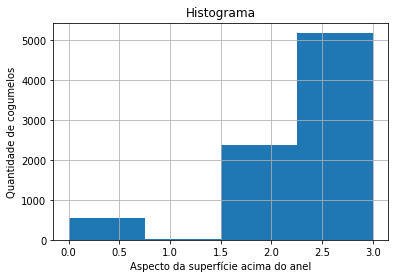

In [13]:

# Gera um histograma para o atributo "stalk-surface-above-ring"
# stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

# Mapeando os valores do atributo nominal como numérico
atrib_map = {"f":0, "y":1, "k":2, "s":3}

# Aplicando o mapeamento ao dataframe, em novo atributo
dfenc = df.copy()
dfenc["stalk-surface-above-ring"] = df["stalk-surface-above-ring"].map(atrib_map)

dfenc.hist(column="stalk-surface-above-ring", bins=4)
plt.xlabel("Aspecto da superfície acima do anel")
plt.ylabel("Quantidade de cogumelos")
plt.title("Histograma")
plt.show()


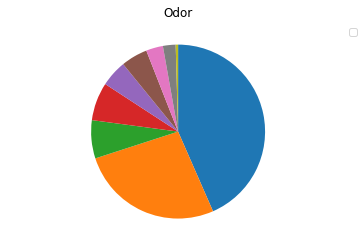

In [15]:
# Mostrar gráfico pizza para o atributo "odor"
# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

# Obtém as quantidades
labels = df["odor"].value_counts().index

# Gráfico de Pizza
fatias = plt.pie(df["odor"].value_counts(), startangle=90, counterclock=False)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title("Odor")
plt.show()

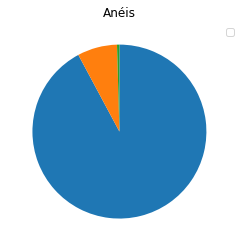

In [16]:
# Mostrar gráfico pizza para o atributo "qtde de anéis"
# ring-number: none=n,one=o,two=t

# Obtém as quantidades
labels = df["ring-number"].value_counts().index

# Gráfico de Pizza
fatias = plt.pie(df["ring-number"].value_counts(), startangle=90, counterclock=False) 
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title("Anéis")
plt.show()

In [17]:
# Codifica como numérico os atributos nominais do dataframe
from sklearn.preprocessing import LabelEncoder

lblenc = LabelEncoder()
for col in df.columns:
    df[col] = lblenc.fit_transform(df[col])
 
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [24]:
# Verifica alguns valores codificados
print(df["cap-color"].unique())
print(df["odor"].unique())
print(df["stalk-color-above-ring"].unique())
print(df["ring-number"].unique())

[4 9 8 3 2 5 0 7 1 6]
[6 0 3 5 2 1 8 7 4]
[7 3 6 4 0 2 5 1 8]
[1 2 0]


In [25]:
# Verifica os somatórios do atributo de resposta
# 0 = e = edible
# 1 = p = poisonous
print(df.groupby("class").size())

class
0    4208
1    3916
dtype: int64


## Preparação dos dados para os algoritmos de Machine Learning

In [30]:
# Separa os atributos preditores do atributo de resposta
X = df.iloc[:, 1:]  # todas as instâncias dos atributos preditores
y = df.iloc[:, 0]    # todas as instâncias do atributo de resposta (class)
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [31]:
# Aplica formato de matriz esparsa aos atributos categóricos (no caso, todos)
# Similar ao one-hot-encoder
X = pd.get_dummies(X, columns=X.columns, drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
# Como todos os atributos são categóricos, o get_dummies deixou os valores ficaram com 0 ou 1. 
# Sendo assim, não precisa fazer normalização (standardising) dos valores.
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nX = scaler.fit_transform(X)\nX\n'

In [0]:
# Divide o dataframe em conjunto de treino e conjunto de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
# a continuar...

### Partes do cogumelo


![Partes do cogumelo](https://infovisual.info/storage/app/media/01/img_en/024%20Mushroom.jpg)